# Import

In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
from sklearn.metrics import r2_score

%matplotlib inline

# Importing Training & Test Data

In [568]:
train_data=pd.read_csv('train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [569]:
test_data=pd.read_csv('test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data Preprocessing

Test Data

In [570]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [571]:
train_data = train_data.drop((missing_data[missing_data['Total'] >= 1]).index,1)
train_data.isnull().sum().max() 

0

In [572]:
features = train_data[['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]
price = train_data[['SalePrice']]

In [573]:
testing = test_data[['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

In [574]:
X_train = pd.get_dummies(features)
y_train = pd.get_dummies(price)

In [575]:
testing.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [576]:
testing=pd.get_dummies(features)


In [577]:
X_train.shape

(1460, 215)

In [578]:
testing.shape

(1460, 215)

In [579]:
# Splitting training Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_train, y_train, test_size=0.5 , shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (730, 215) (730, 1)
Test set: (730, 215) (730, 1)


In [580]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
testing = scaler.fit_transform(testing)

# Model Building

In [581]:
model = tf.keras.Sequential([
keras.layers.Dense(512 , activation='relu' , input_shape=[215]),
keras.layers.Dense(512 , activation='relu') ,
keras.layers.Dense(512 , activation='relu') ,
keras.layers.Dense(512 , activation='relu') ,    

keras.layers.Dense(1) ])

# Model Compiling

In [582]:
model.compile(optimizer='adam' , loss='mse' , metrics=['mse','mae'])

# Fitting Trainging Values

In [583]:
history=model.fit( X_train,y_train ,epochs = 20,steps_per_epoch=len(X_train)/30,verbose=1,shuffle=True)

Epoch 1/20
24/24 [==============================] - 1s 6ms/step - loss: 41041073309.5385 - mse: 41041073309.5385 - mae: 183472.5108
Epoch 2/20
24/24 [==============================] - 0s 6ms/step - loss: 27310783881.8462 - mse: 27310783881.8462 - mae: 148594.3924
Epoch 3/20
24/24 [==============================] - 0s 6ms/step - loss: 3255089447.3846 - mse: 3255089447.3846 - mae: 37226.8510
Epoch 4/20
24/24 [==============================] - 0s 7ms/step - loss: 1097979254.1538 - mse: 1097979254.1538 - mae: 23186.5316
Epoch 5/20
24/24 [==============================] - 0s 8ms/step - loss: 701193612.3077 - mse: 701193612.3077 - mae: 17844.6832
Epoch 6/20
24/24 [==============================] - 0s 6ms/step - loss: 601533670.1538 - mse: 601533670.1538 - mae: 15352.9606
Epoch 7/20
24/24 [==============================] - 0s 6ms/step - loss: 488455792.0000 - mse: 488455792.0000 - mae: 13826.3256
Epoch 8/20
24/24 [==============================] - 0s 6ms/step - loss: 472224788.9231 - mse: 472

# Model Evaluation

In [584]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 0s 3ms/step - loss: 952974400.0000 - mse: 952974400.0000 - mae: 20596.3379


[952974400.0, 952974400.0, 20596.337890625]

# Prediction

In [585]:
predicted_test_data=model.predict(X_test)
print(r2_score(predicted_test_data, y_test))
predicted_train_data=model.predict(X_train)
print(r2_score(predicted_train_data, y_train))

0.8557363412400432
0.972880257619147


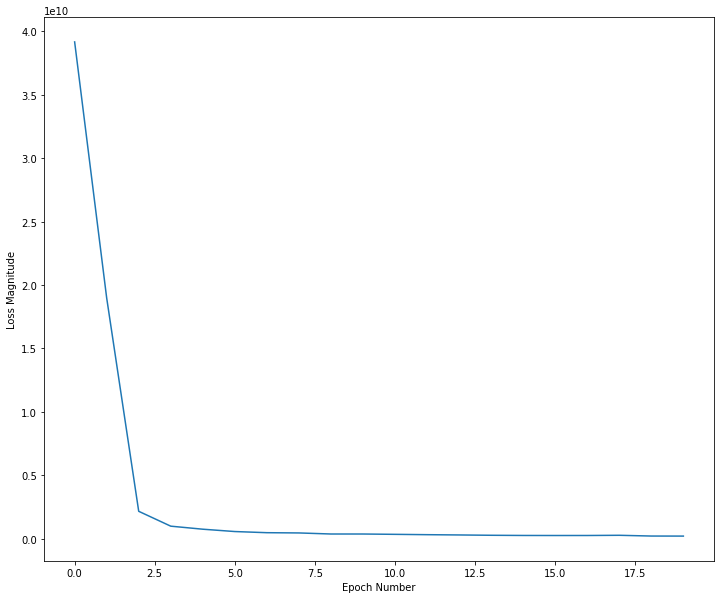

In [586]:
#PLOTTING LOSS 
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


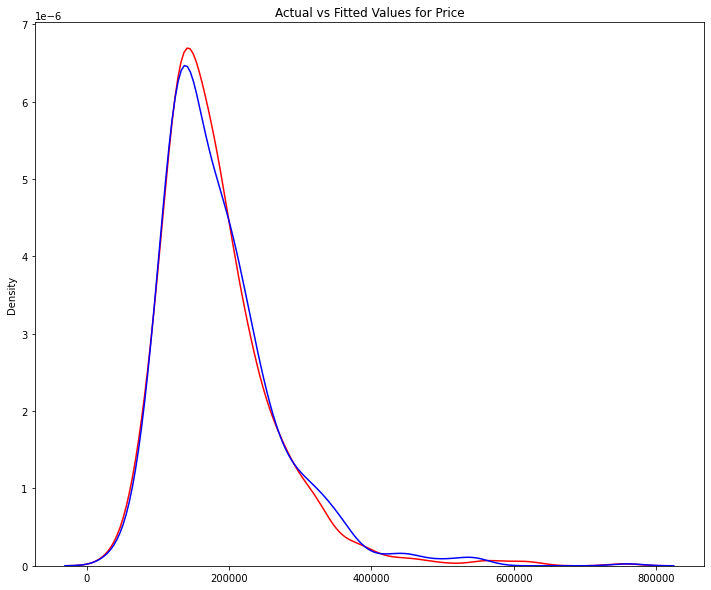

In [587]:
# DISTRIBUTION PLOT Training

plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(predicted_train_data, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


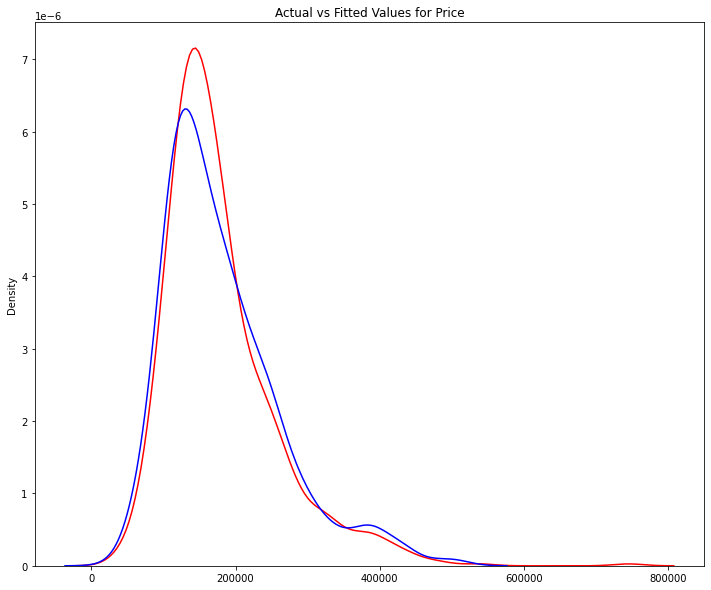

In [588]:
# DISTRIBUTION PLOT Testing

plt.figure(figsize=(width, height))

ax2 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predicted_test_data, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

# Submission

In [589]:
preds = model.predict(testing)
pred = preds.astype(np.float64)
model.save("regression_model")

INFO:tensorflow:Assets written to: regression_model/assets
